In [1]:
import models
import pandas as pd
import numpy as np

c:\Users\aruav\Desktop\Deepen\CTG\cambio\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
lags = [1,2,3,4,5,6,7]

ipca = models.predict_ipca(lags)
cambio = models.predict_cambio(lags)
selic = models.predict_selic(lags)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False

In [31]:
for i in range(1,8):
    ipca[i]['square_err'] = (ipca[i]['indice'] - ipca[i]['prediction']).apply(lambda x: x ** 2)
    cambio[i]['square_err'] = (cambio[i]['cambio'] - cambio[i]['prediction']).apply(lambda x: x ** 2)
    selic[i]['square_err'] = (selic[i]['selic'] - selic[i]['prediction']).apply(lambda x: x ** 2)

In [43]:
for i in range(1,8):
    ipca[i]['res'] = ipca[i]['prediction'] - ipca[i]['indice']
    cambio[i]['res'] = cambio[i]['prediction'] - cambio[i]['cambio']
    selic[i]['res'] = selic[i]['prediction'] - selic[i]['selic']

In [79]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

#### IPCA

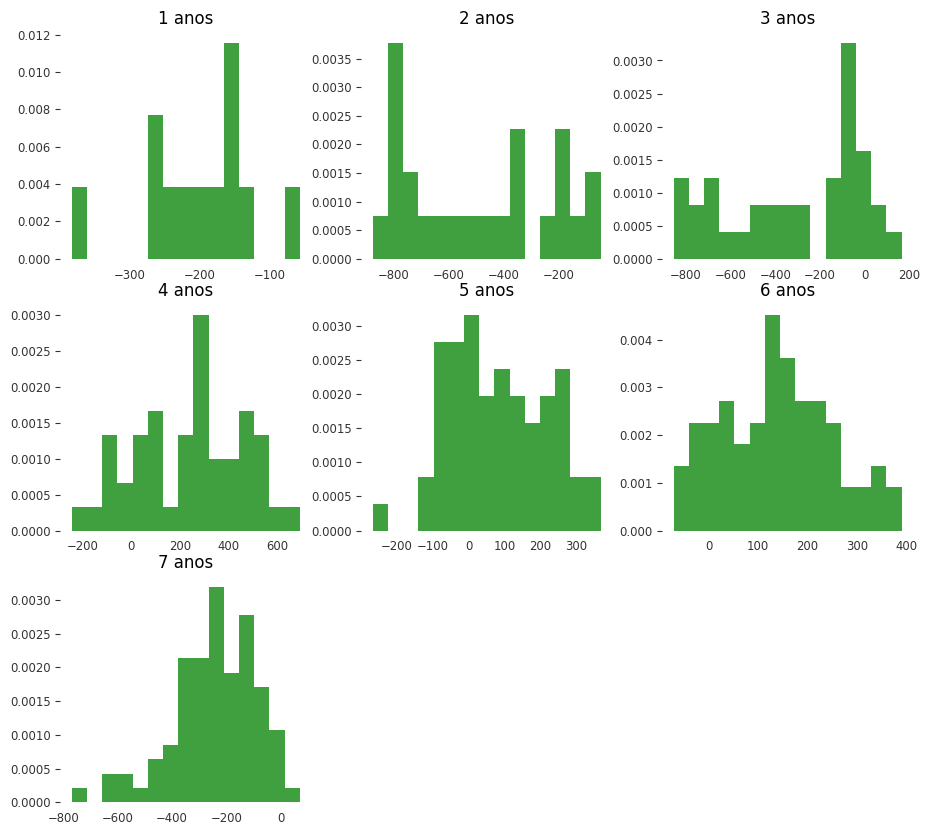

In [55]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    _ = plt.hist(ipca[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

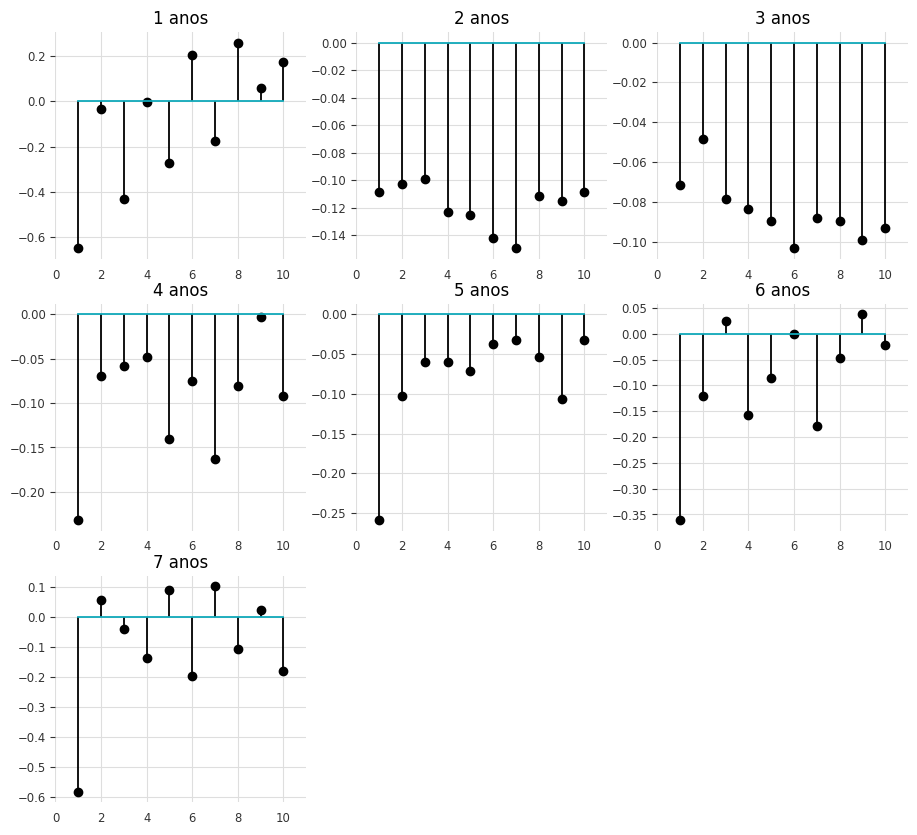

In [90]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(ipca[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

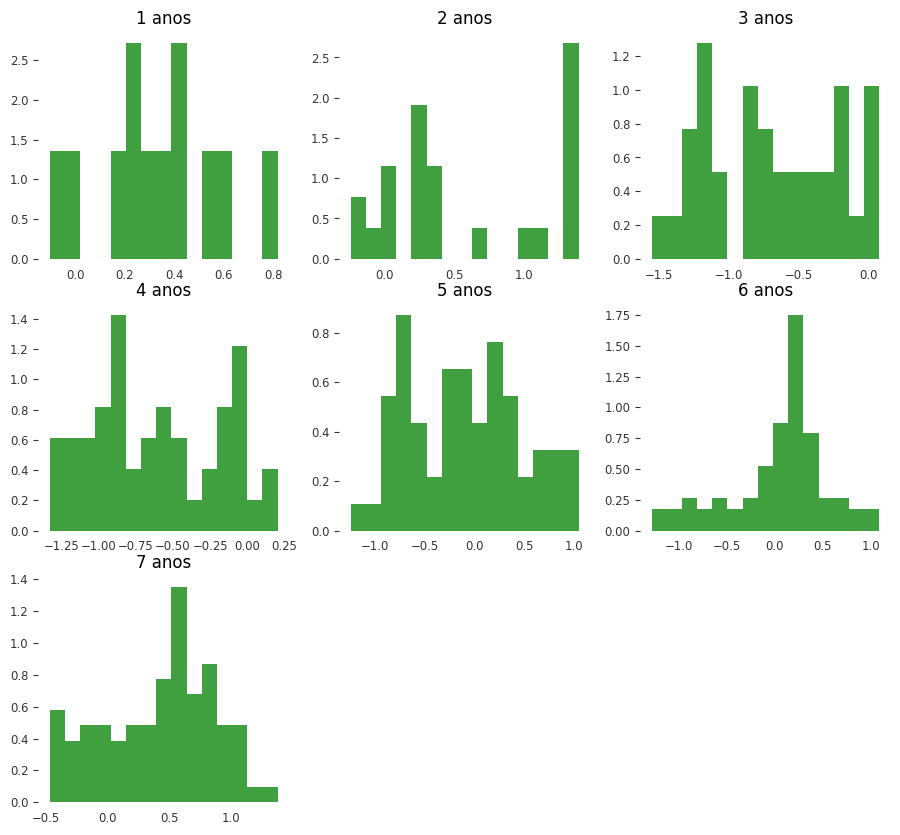

In [52]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(cambio[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

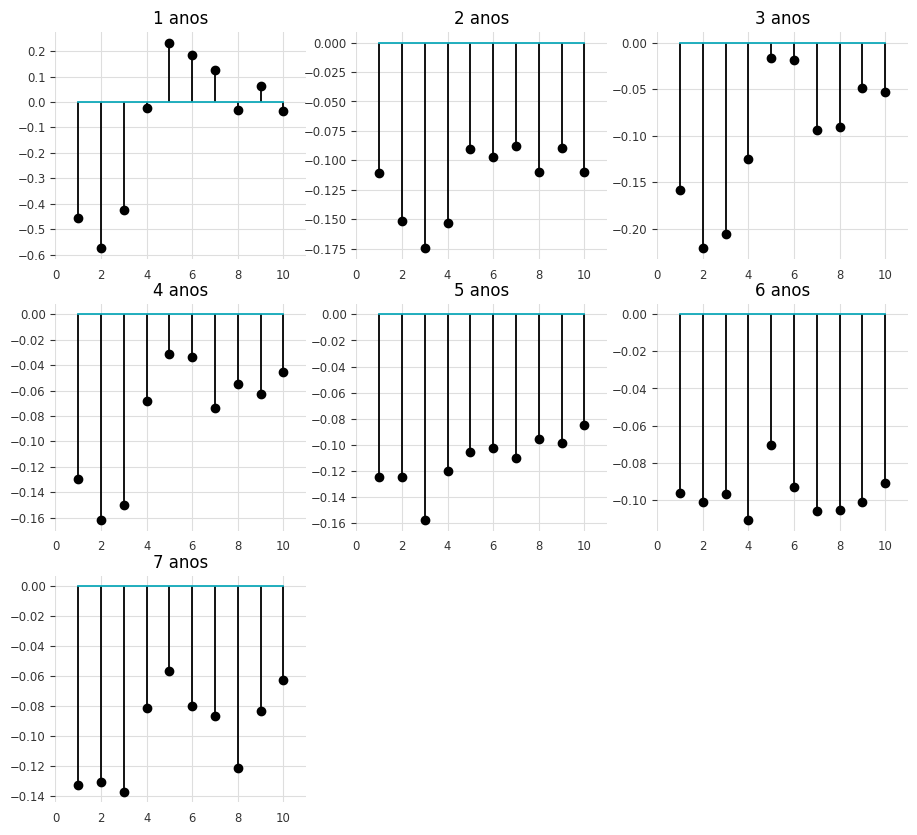

In [91]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(cambio[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

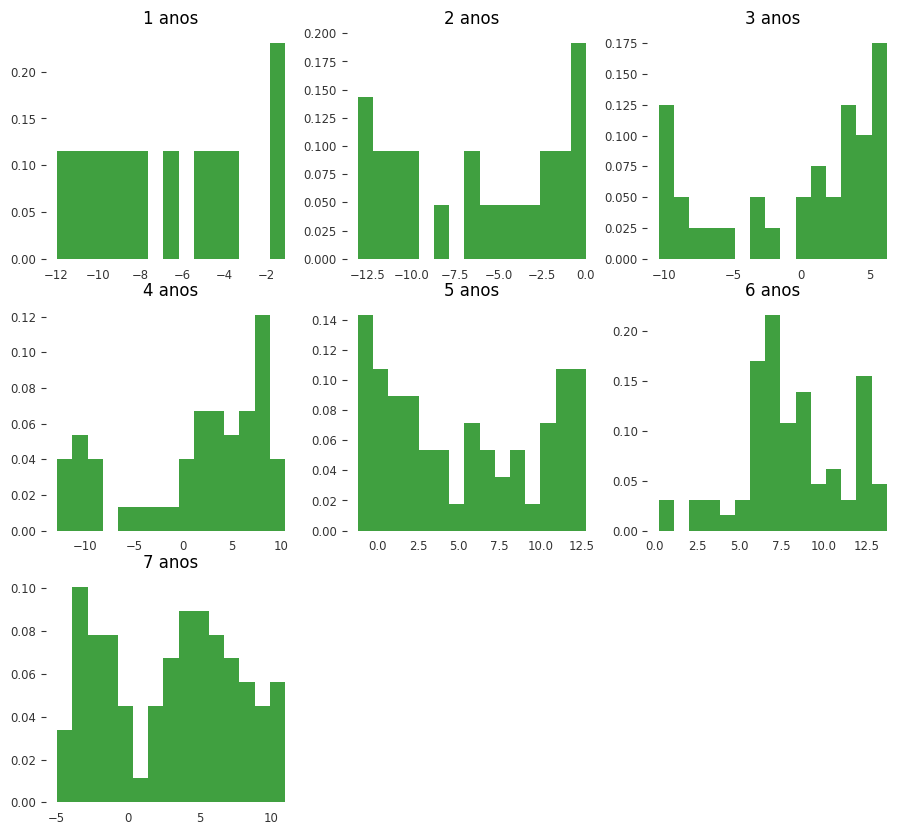

In [53]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(selic[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

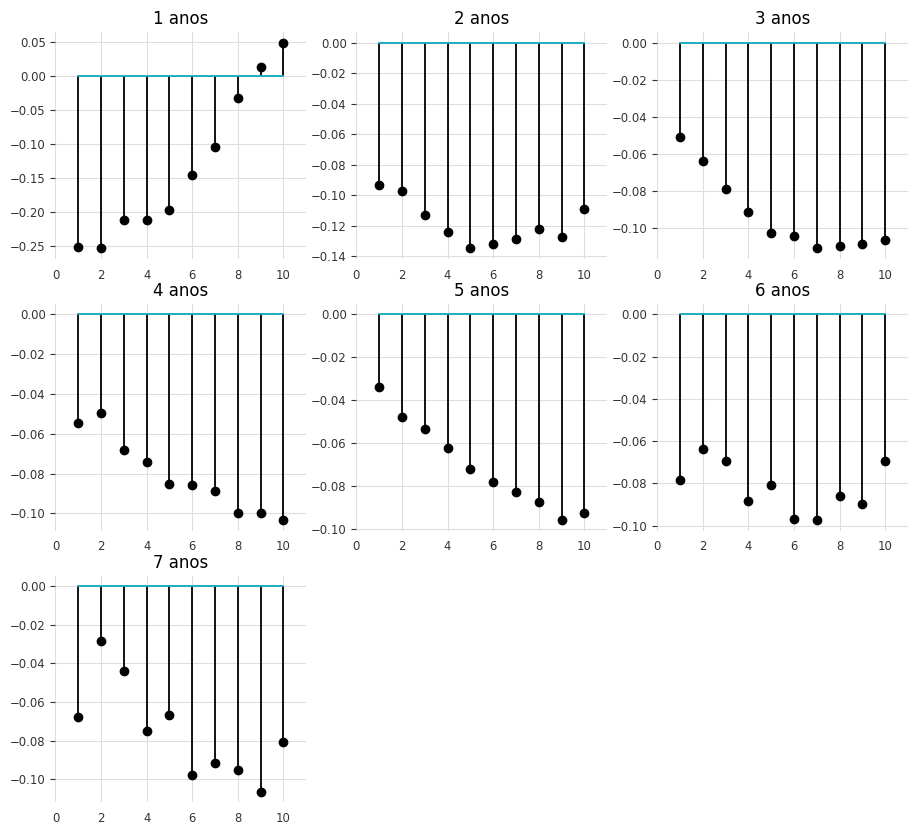

In [92]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(selic[i]['res'].dropna(),nlags = 10))
    lags = range(1,11)
    plt.stem(lags,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()